In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
import os
from tensorflow.keras.preprocessing import image  
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


In [3]:
df_train=r"C:\Users\ALMot7da\Downloads\work Deep Learning\Covid19-dataset\train"
df_test=r"C:\Users\ALMot7da\Downloads\work Deep Learning\Covid19-dataset\test"

In [4]:
image_classes=os.listdir(df_train)
image_classes

['Covid', 'Normal', 'Viral Pneumonia']

In [5]:
image_class=os.listdir(df_test)
image_class

['Covid', 'Normal', 'Viral Pneumonia']

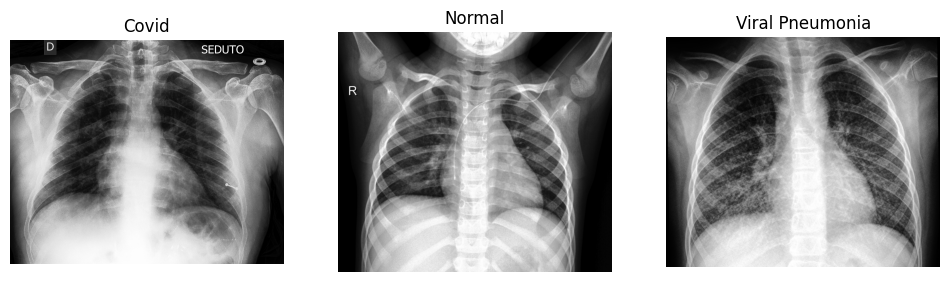

In [6]:
def plot_image(image_classes):
    plt.figure(figsize = (12,12))

    for i , category in enumerate(image_classes):
        image_path = df_train + '/' + category
        images_in_folder = os.listdir(image_path)

        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image

        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255

        plt.subplot(1, 3, i+ 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()


plot_image(image_classes)
        
    

In [7]:
image_class=os.listdir(df_test)
image_class

['Covid', 'Normal', 'Viral Pneumonia']

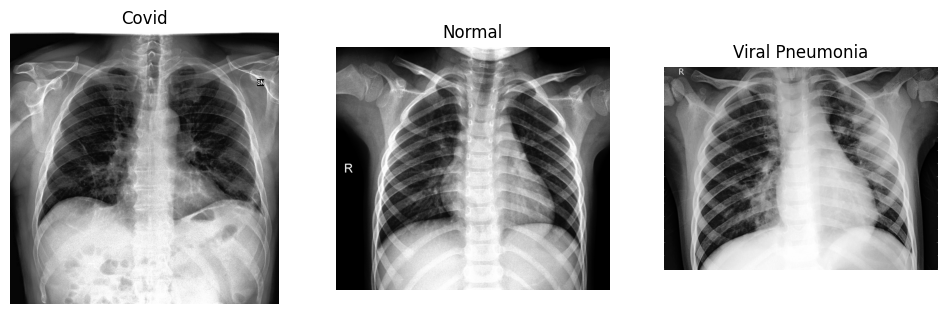

In [8]:
def img_test(image_class):
    plt.figure(figsize=(12,12))
    for i,category in enumerate(image_class):
        img_path=df_test+'/'+category
        img_path_folder=os.listdir(img_path)

        first_img=img_path_folder[0]
        first_img_path=img_path+'/'+first_img

        img=image.load_img(first_img_path)
        img_array=image.img_to_array(img)/255

        plt.subplot(3,3,i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')

    plt.show()
img_test(image_class)   

In [9]:
genertoy=ImageDataGenerator(rescale=1/255)


In [10]:
train_data=genertoy.flow_from_directory(df_train,target_size=(224,224),batch_size=32)

Found 251 images belonging to 3 classes.


In [11]:
test_data=genertoy.flow_from_directory(df_test,target_size=(224,224),batch_size=32)

Found 66 images belonging to 3 classes.


In [12]:
cnn_model=Sequential()

cnn_model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dense(128,activation='relu'))


cnn_model.add(Dense(3,activation=softmax))

              

In [13]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,726,531 (98.14 MB)

 Trainable params: 25,726,531 (98.14 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
x=cnn_model.fit(train_data,epochs=7,validation_data=test_data)

Epoch 1/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.4182 - loss: 9.6496 - val_accuracy: 0.4545 - val_loss: 1.1246
Epoch 2/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.6322 - loss: 0.9372 - val_accuracy: 0.5606 - val_loss: 0.8526
Epoch 3/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8441 - loss: 0.5757 - val_accuracy: 0.7879 - val_loss: 0.5457
Epoch 4/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9283 - loss: 0.2172 - val_accuracy: 0.6970 - val_loss: 0.5301
Epoch 5/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9492 - loss: 0.1670 - val_accuracy: 0.8788 - val_loss: 0.2835
Epoch 6/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9785 - loss: 0.0800 - val_accuracy: 0.9242 - val_loss: 0.2035
Epoch 7/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9835 - loss: 0.0540 - val_accuracy: 0.9394 - val_loss: 0.1623


In [16]:
cnn_model.evaluate(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step - accuracy: 0.9463 - loss: 0.1583


[0.16225029528141022, 0.939393937587738]

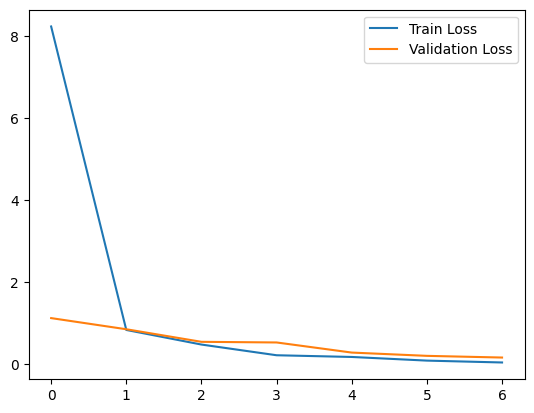

In [17]:
plt.plot(x.history['loss'], label = 'Train Loss')
plt.plot(x.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

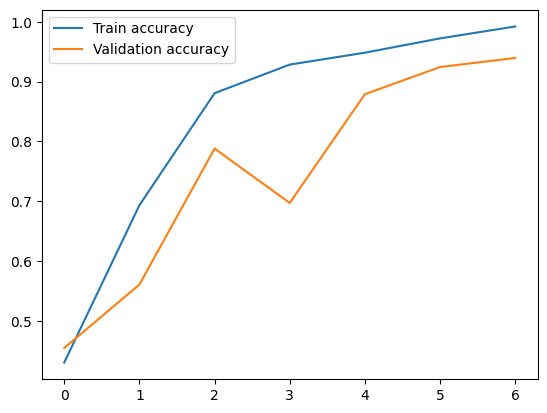

In [18]:
plt.plot(x.history['accuracy'], label = 'Train accuracy')
plt.plot(x.history['val_accuracy'], label = 'Validation accuracy')
plt.legend()
plt.show()

In [19]:
cnn_model.evaluate(train_data)

8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9980 - loss: 0.0126


[0.017634456977248192, 0.9960159659385681]

In [20]:
cnn_model.save('covid_19_model.h5')

In [27]:
class_map=dict([value,key] for key,value in  test_data.class_indices.items())
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [28]:
def predict_class(test_image, actual_label):
    
    
    
    testing_img = image.load_img(test_image, target_size = (224, 224))
    
    test_img_array = image.img_to_array(testing_img) / 255

    
    test_img_input = test_img_array.reshape(1, test_img_array.shape[0],
                                               test_img_array.shape[1], test_img_array.shape[2])
    
    
    
    predicted_class = np.argmax(cnn_model.predict(test_img_input))
    predicted_label = class_map[predicted_class]

    plt.figure(figsize = (4,4))
    plt.imshow(test_img_array)
    plt.title('Actual Label : {}, Prediected Label : {}'.format(actual_label, predicted_label))
    plt.grid()
    plt.axis('off')

In [29]:
test_image=r"C:\Users\ALMot7da\Downloads\work Deep Learning\Covid19-dataset\test\Normal\0121.jpeg"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


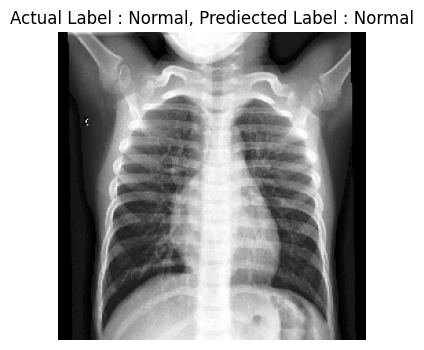

In [30]:
predict_class(test_image, actual_label = 'Normal')

In [32]:
%%writefile covid_19app.py

import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

model_path = r"C:\Users\ALMot7da\Documents\covid_19_model.h5"
model = load_model(model_path) 

class_map = {0: "COVID", 1: "Normal", 2: "Pneumonia"}

st.title("COVID-19 Detection from Chest X-ray")

uploaded_file = st.file_uploader("Upload Chest X-ray Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    try:
        img = Image.open(uploaded_file).convert("RGB")
    except Exception as e:
        st.error("Error loading image. Please upload a valid image file.")
        st.stop()
    
    st.image(img, caption="Uploaded Image", use_container_width=True)

    # Resize image to model input size
    img = img.resize((224, 200))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    prediction = model.predict(img_array)[0]  # prediction shape (3,)
    predicted_class = np.argmax(prediction)
    predicted_label = class_map[predicted_class]

    # Display main prediction
    st.success(f"**Prediction:** {predicted_label}")

    # Display probabilities for all classes
    st.subheader("Prediction Confidence")
    for i, label in class_map.items():
        st.write(f"{label}: {prediction[i]*100:.2f}%")

else:
    st.info("Please upload an image file to get prediction.")



Overwriting covid_19app.py


In [26]:
'''import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

model_path = r"C:\Users\ALMot7da\Documents\covid_19_model.h5"
model = load_model(model_path) 


class_map = {0: "COVID", 1: "Normal", 2: "Pneumonia"}

st.title("COVID-19 Detection from Chest X-ray")

uploaded_file = st.file_uploader("Upload Chest X-ray Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    img = Image.open(uploaded_file).convert("RGB")
    st.image(img, caption="Uploaded Image", use_container_width=True)

    img =  cv2.resize(img,(200, 200),interpolation = cv2.INTER_CUBIC)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_map[predicted_class]

    st.success(f"Prediction: **{predicted_label}**")

else:
    st.info("Please upload an image file to get prediction.")

'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 178-179: truncated \UXXXXXXXX escape (222398060.py, line 1)